In [1]:
import pandas as pd

train_output=pd.read_csv("resources/analyze/train_output.csv")
valid_output=pd.read_csv("resources/analyze/valid_output.csv")

total_output=pd.concat((train_output,valid_output),axis=0)

In [2]:
total_output=total_output.drop_duplicates(subset=['text'])

In [3]:
total_output.to_excel("total_prediction_result.xlsx",engine='openpyxl')

In [3]:
from matplotlib import pyplot as plt
plt.rc('font',family='NanumGothic')

In [6]:
def frequency_plot(data,title_name):
    topic_map={0: '생활문화',1:'스포츠',2:'정치',3:'사회',4:'IT과학',5:'경제',6:'세계'}

    fig,ax= plt.subplots(1,1,figsize=(15,8))
    xlabel=list(set(data['target']))
    ax.set_title(f"{title_name}")
    ax.bar(xlabel,data['target'].value_counts(sort=False))
    print(data['target'].value_counts(sort=False))

    ax.set_xticks(range(len(xlabel)))
    ax.set_xticklabels([f"{x} - {topic_map[x]}" for x in xlabel])  # xlabel의 정수 값을 topic_map에서 매핑하여 라벨로 설정



**labels**
'생활문화': 0
'스포츠': 1
'정치': 2
'사회': 3 
'IT과학': 4 
'경제': 5 
'세계': 6

target
0    1575
1    1687
2    1647
3    1535
4    1475
5    1346
6    1666
Name: count, dtype: int64


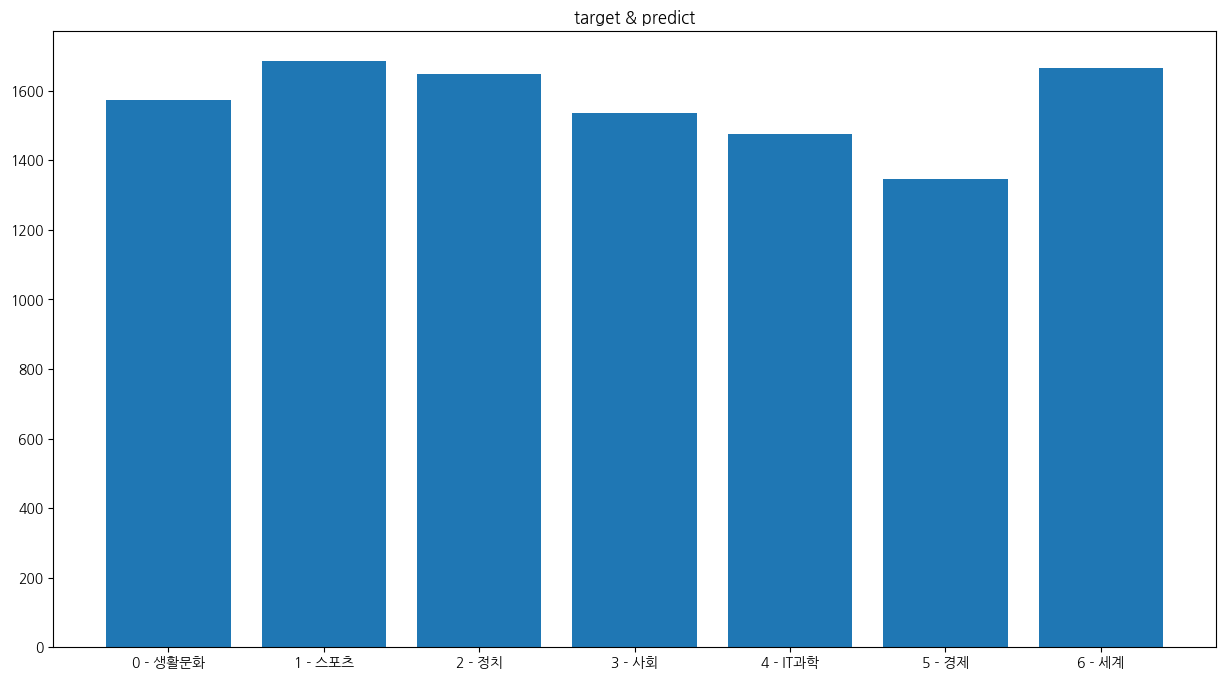

In [7]:
frequency_plot(total_output,'target & predict')

In [8]:
wrong_answer_df=total_output[total_output['target']!=total_output['predicted_value']]
wrong_answer_df

,ID,text,target,target_name,source,predicted_value
10,ynat-v1_train_00060,공룡 파충류보다는 타조 매 등 새에 가깝다,0,생활문화,not_noisy,4
22,ynat-v1_train_00087,"수능 6월 모의평가 문제 유출 사건, 교사 1명 구속",0,생활문화,noisy,3
24,ynat-v1_train_00087,한 교사가 6월 CSAT 모의고사 문제 유출 혐의로 구속됐다.,0,생활문화,noisy,3
47,ynat-v1_train_00132,올해 경제 성장 전망에 대해 전문가들의 논평이 나오고 있다.,0,생활문화,noisy,5
48,ynat-v1_train_00132,올해 경제 성장률 전망에 대해 전문가들이 의견을 나누고 있다,0,생활문화,noisy,5
...,...,...,...,...,...,...
1138,ynat-v1_train_01008,미국과 멕시코에서 열리는 제2회 월드컵 축구 대회의 개막... 글로벌 팬들이 흥분하...,6,세계,noisy,1
1151,ynat-v1_train_01056,KBL 지원 채용,6,세계,noisy,1
1153,ynat-v1_train_01271,밀라노 지오디 광장의 야외 광고.,6,세계,noisy,0
1155,ynat-v1_train_01346,"초등학교 3부, 혁신적인 Y 교육 방식으로 학생들의 학습 효과 극대화",6,세계,noisy,3


target
0    235
1    167
2    112
3    218
4    164
5    208
6    256
Name: count, dtype: int64


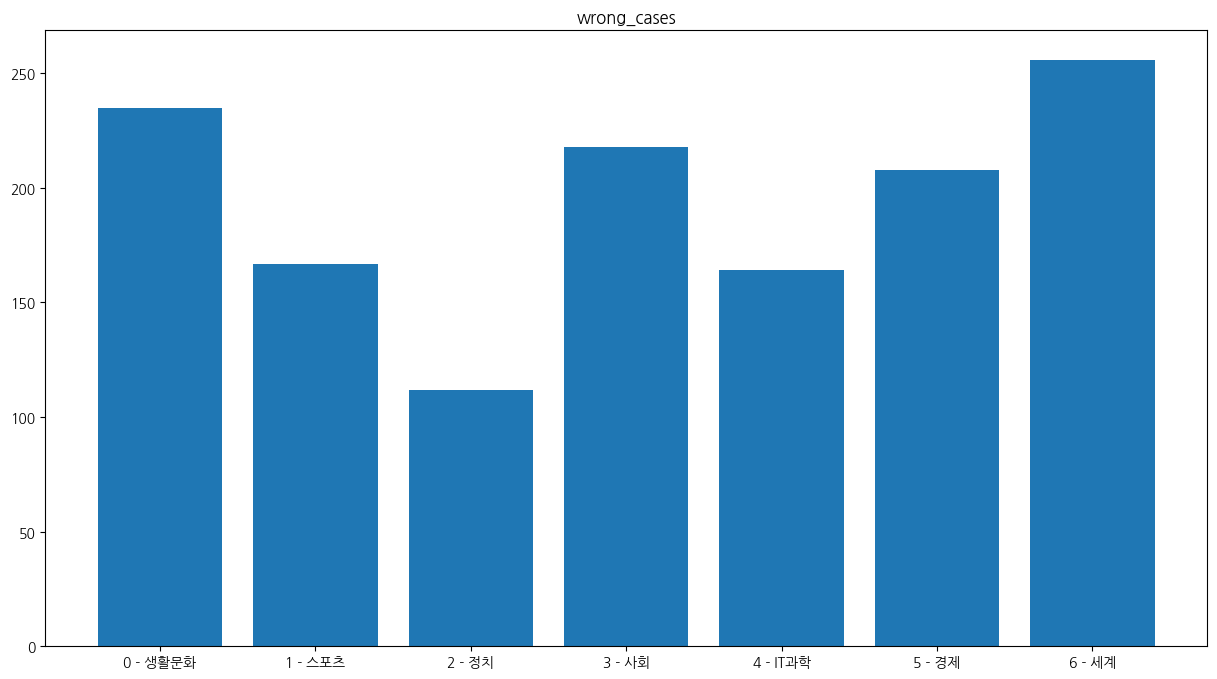

In [9]:
frequency_plot(wrong_answer_df,'wrong_cases')

In [10]:
def select_frequency_plot(data,select):
    topic_map={0: '생활문화',1:'스포츠',2:'정치',3:'사회',4:'IT과학',5:'경제',6:'세계'}

    fig,ax= plt.subplots(1,1,figsize=(15,8))
    xlabel=list(set(data[data['predicted_value']==select]['target']))

    ax.set_title(f"selected topic : {topic_map[select]}")
    ax.bar(xlabel,data[data['predicted_value']==select]['target'].value_counts(sort=False))
    print(data[data['predicted_value']==select]['target'].value_counts(sort=False))

    ax.set_xticks(xlabel)
    ax.set_xticklabels([f"{x} - {topic_map[x]}" for x in xlabel])  # xlabel의 정수 값을 topic_map에서 매핑하여 라벨로 설정



target
0    24
1    16
2    49
3    21
4    34
5    16
Name: count, dtype: int64


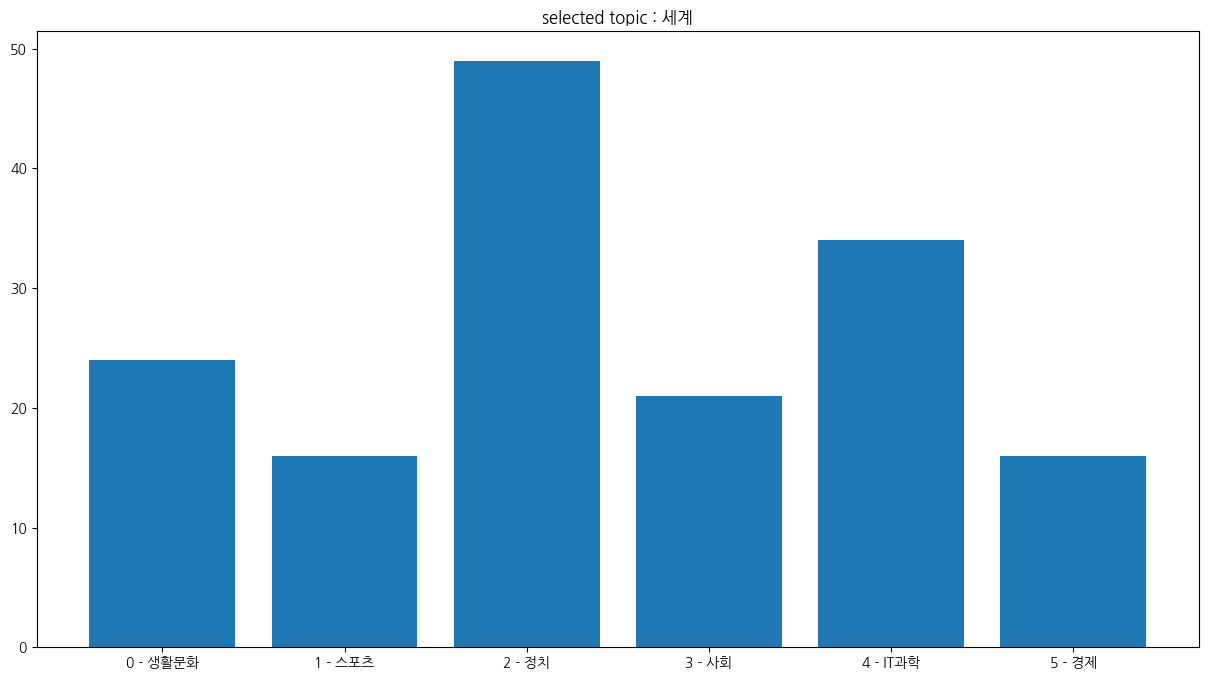

In [39]:
select_frequency_plot(wrong_answer_df,6)

In [51]:
wrong_answer_df.to_excel("wrong_predict.xlsx",engine='openpyxl')